 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
%matplotlib inline
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [3]:
whale = pd.read_csv('C:/Users/Alema/Desktop/FinTechClass/Homework/Homework_4 (pandas)/whale_returns.csv', delimiter=',', index_col='Date', parse_dates=True, infer_datetime_format=True)

algo = pd.read_csv('C:/Users/Alema/Desktop/FinTechClass/Homework/Homework_4 (pandas)/algo_returns.csv', delimiter=',', index_col='Date', parse_dates=True, infer_datetime_format=True)

sp500 = pd.read_csv('C:/Users/Alema/Desktop/FinTechClass/Homework/Homework_4 (pandas)/sp500_history.csv', delimiter=',', index_col='Date', parse_dates=True, infer_datetime_format=True)




## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Count nulls

whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls

whale.dropna(inplace = True)
whale


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Count nulls

algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo.dropna(inplace = True)
algo

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Count nulls

sp500.isnull().sum()

Close    0
dtype: int64

In [9]:
# Drop nulls

sp500.dropna(inplace = True)
sp500

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [10]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types

sp500["Close"] = sp500["Close"].str.replace("$", "")
sp500["Close"] = sp500["Close"].astype("float")


<ipython-input-11-ca7dbfc1b2d7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500["Close"] = sp500["Close"].str.replace("$", "")


In [12]:
# Calculate Daily Returns
sp500daily_returns = (sp500 - sp500.shift(1)) / sp500.shift(1)
sp500daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
sp500daily_returns.isnull().sum()

Close    1
dtype: int64

In [14]:
# Drop nulls

sp500daily_returns.dropna(inplace = True)



In [15]:
# Rename `Close` Column to be specific to this portfolio.

sp500daily_returns.rename(columns ={'Close': 'S&P 500'}, inplace=True)



## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

#daily_returns
#algo
#whale


Result = pd.concat([algo, whale, sp500daily_returns], axis="columns", join="inner")
Result



,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000509
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.002279
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

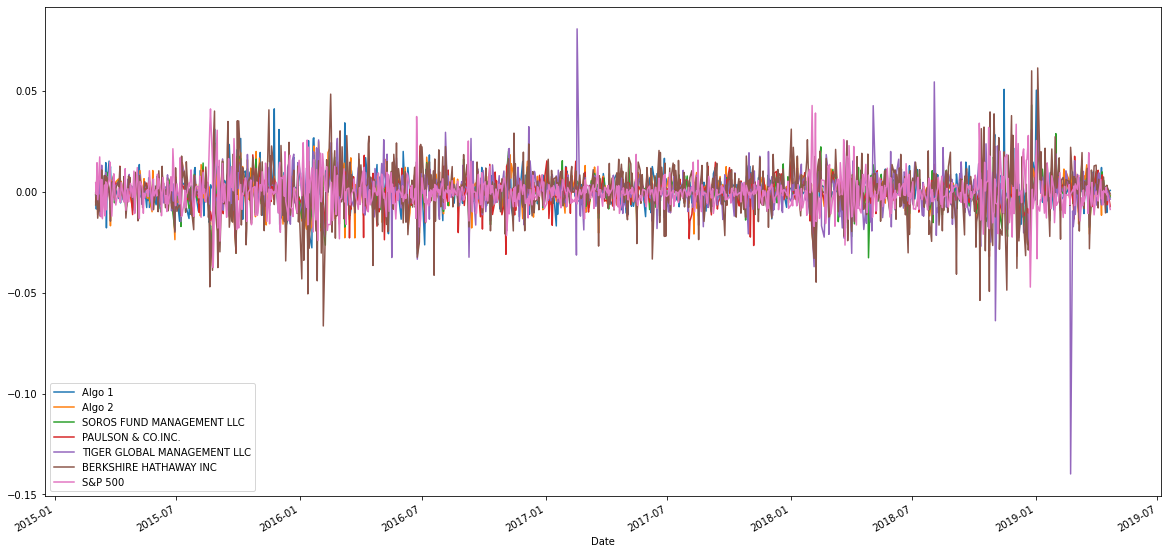

In [17]:
# Plot daily returns of all portfolios

Result.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

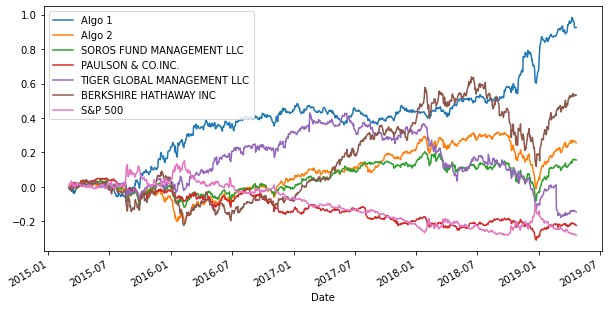

In [18]:
# Calculate cumulative returns of all portfolios

cummulative = (1 + Result).cumprod() -1
cummulative

# Plot cumulative returns

cummulative.plot(figsize=(10,5))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

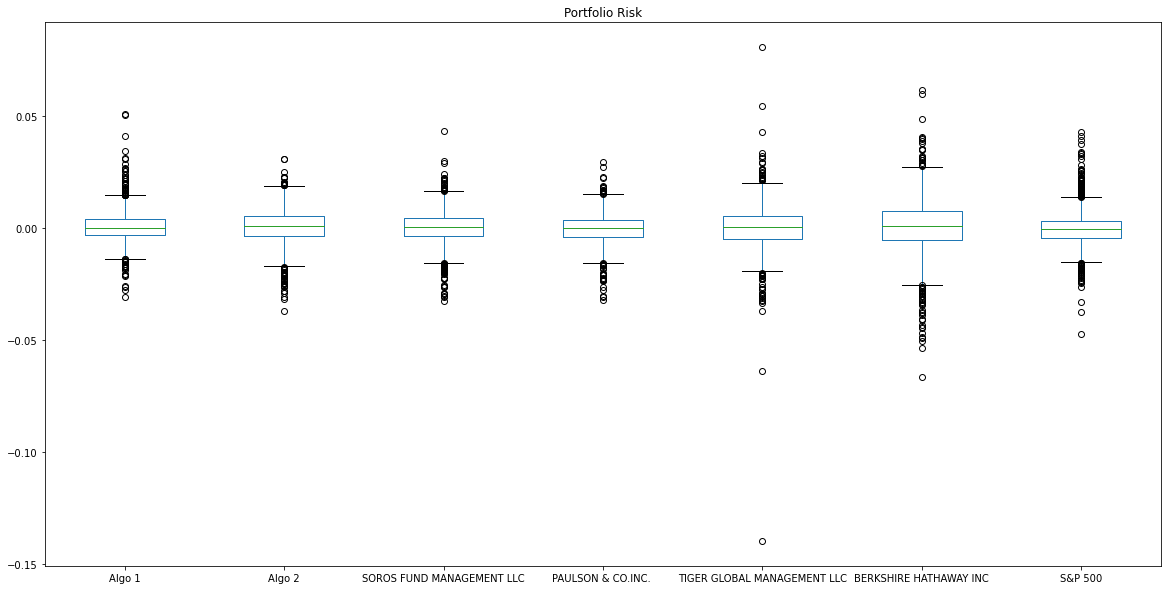

In [31]:
# Box plot to visually show risk

Result.plot.box(title = 'Portfolio Risk', figsize=(20,10))

### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios
# Calculate  the daily standard deviation of S&P 500

daily_std = cummulative.std()
print(daily_std)

Algo 1                         0.231772
Algo 2                         0.131642
SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
S&P 500                        0.114846
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [33]:
# Determine which portfolios are riskier than the S&P 500

daily_std = daily_std.sort_values(ascending=False)
daily_std.head()


BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
TIGER GLOBAL MANAGEMENT LLC    0.149652
Algo 2                         0.131642
S&P 500                        0.114846
dtype: float64

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
TIGER GLOBAL MANAGEMENT LLC    2.375658
Algo 2                         2.089756
S&P 500                        1.823124
PAULSON & CO.INC.              1.404053
SOROS FUND MANAGEMENT LLC      1.161806
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

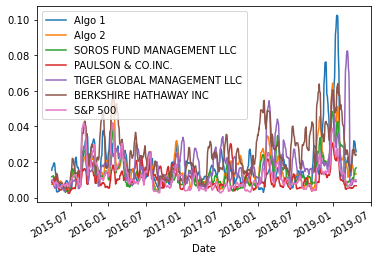

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

Day = cummulative.rolling(window=21).std()

# Plot the rolling standard deviation

Day = cummulative.rolling(window=21).std().plot()


### Calculate and plot the correlation

<AxesSubplot:>

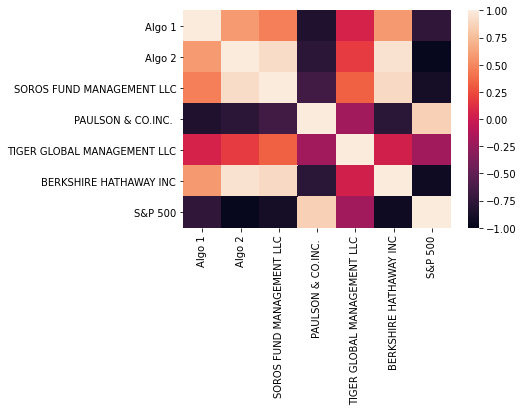

In [37]:
# Calculate the correlation

correlation = cummulative.corr()

# Display de correlation matrix

sns.heatmap(correlation, vmin =-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [38]:
# Calculate covariance of a single portfolio

covaraince = cummulative['Algo 1'].cov(cummulative['S&P 500'])
covaraince

-0.019775435384048818

In [39]:
# Calculate variance of S&P 500

varience = cummulative['S&P 500'].var()
varience

0.01318961312579499

In [40]:
# Computing beta

Algo_beta = covaraince / varience
Algo_beta

-1.499318834862101

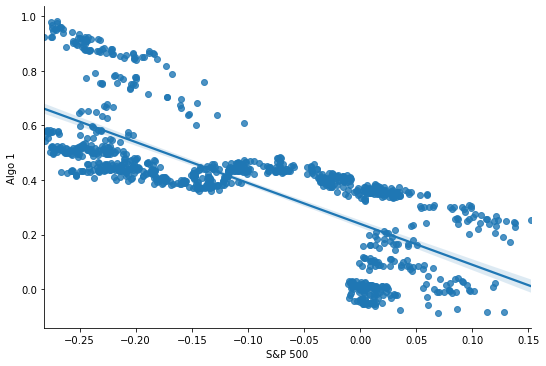

In [41]:
# Plot beta trend

sns.lmplot(x='S&P 500', y='Algo 1', data=cummulative, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

# Use `ewm` to calculate the rolling window

PASS

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Annualized Sharpe Ratios

sharpe_ratios = (Result.mean() * 252) / (Result.std() * np.sqrt(252))
sharpe_ratios

Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

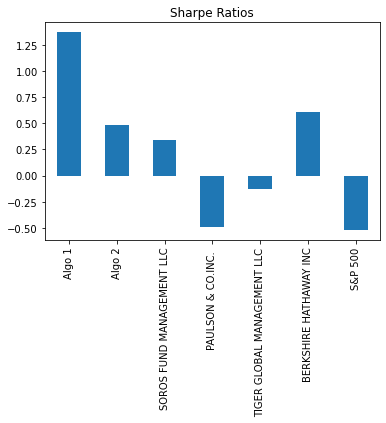

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [76]:
# Reading data from 1st stock
# Reading data from 2nd stock
# Reading data from 3rd stock

# Combine all stocks in a single DataFrame
# Reset Date index
# Reorganize portfolio data by having a column per symbol


AAPL = pd.read_csv('C:/Users/Alema/Desktop/FinTechClass/Homework/Homework_4 (pandas)/aapl_historical.csv', delimiter=',', index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

COST = pd.read_csv('C:/Users/Alema/Desktop/FinTechClass/Homework/Homework_4 (pandas)/cost_historical.csv', delimiter=',', index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

GOOG = pd.read_csv('C:/Users/Alema/Desktop/FinTechClass/Homework/Homework_4 (pandas)/goog_historical.csv', delimiter=',', index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


In [88]:
AAPL.head()
AAPL.rename(columns ={'Trade DATE': 'Date','NOCP': 'Apple'}, inplace=True)
AAPL.drop(['Symbol'], axis=1, inplace=True)
AAPL.head()

,Apple
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [90]:
COST.head()
COST.rename(columns ={'Trade DATE': 'Date','NOCP': 'Costco'}, inplace=True)
COST.drop(['Symbol'], axis=1, inplace=True)
COST.head()

,Costco
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [89]:
GOOG.head()
GOOG.rename(columns ={'Trade DATE': 'Date','NOCP': 'Google'}, inplace=True)
GOOG.drop(['Symbol'], axis=1, inplace=True)
GOOG.head()


,Google
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [91]:

Portfolio = pd.concat([AAPL, COST, GOOG], axis="columns", join="inner")
Portfolio.head()


,Apple,Costco,Google
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [93]:
# Calculate daily returns

Portfolio_daily_returns = (Portfolio - Portfolio.shift(1)) / Portfolio.shift(1)



# Drop NAs

Portfolio_daily_returns.dropna(inplace = True)

# Display sample data
Portfolio_daily_returns.head()

,Apple,Costco,Google
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [94]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
Daily_returns = Portfolio_daily_returns.dot(weights)
# Display sample data
Daily_returns.head()



Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [100]:
# Join your returns DataFrame to the original returns DataFrame
Combo_Portfolio = pd.concat([Result, Daily_returns], axis="columns", join="inner")

Combo_Portfolio.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,0
2018-05-11,0.000358,0.000281,-0.004717,0.000982,0.002624,-0.004125,-0.000883,-0.000012
2018-05-14,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.006889,0.010216
2018-05-15,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.009283
2018-05-16,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.000857,0.001618
2018-05-17,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,0.002639,0.006112


In [96]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Combo_Portfolio.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [108]:
# Calculate the annualized `std`
Combo_Portfolio.std()
Annual_Varience = (Combo_Portfolio.var()*252)
Annual_STD = np.sqrt(Annual_Varience)
Annual_STD

Algo 1                         0.133645
Algo 2                         0.139204
SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
S&P 500                        0.152147
0                              0.213137
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

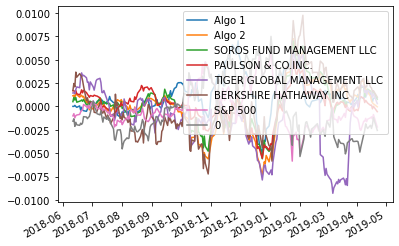

In [109]:
# Calculate rolling standard deviation
# Plot rolling standard deviation

Combo_Portfolio.rolling(window=21).mean().plot()



### Calculate and plot the correlation

<AxesSubplot:>

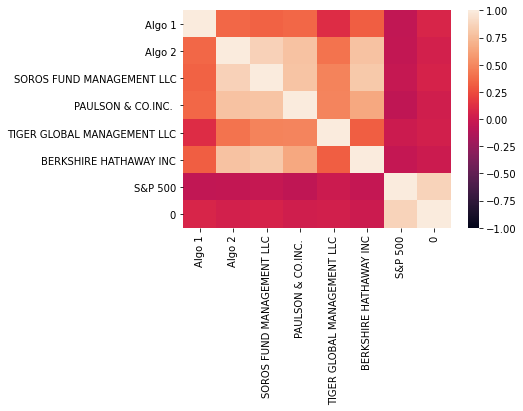

In [111]:
# Calculate and plot the correlation

price_correlation = Combo_Portfolio.corr()

sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [113]:
# Calculate and plot Beta
Combo_covariance = Combo_Portfolio[0].cov(Combo_Portfolio['S&P 500'])
Combo_variance = Combo_Portfolio[0].var()

Combo_Beta = Combo_covariance / Combo_variance
Combo_Beta

0.6210262504894224

<AxesSubplot:title={'center':'Rolling 60-Day Covariance'}>

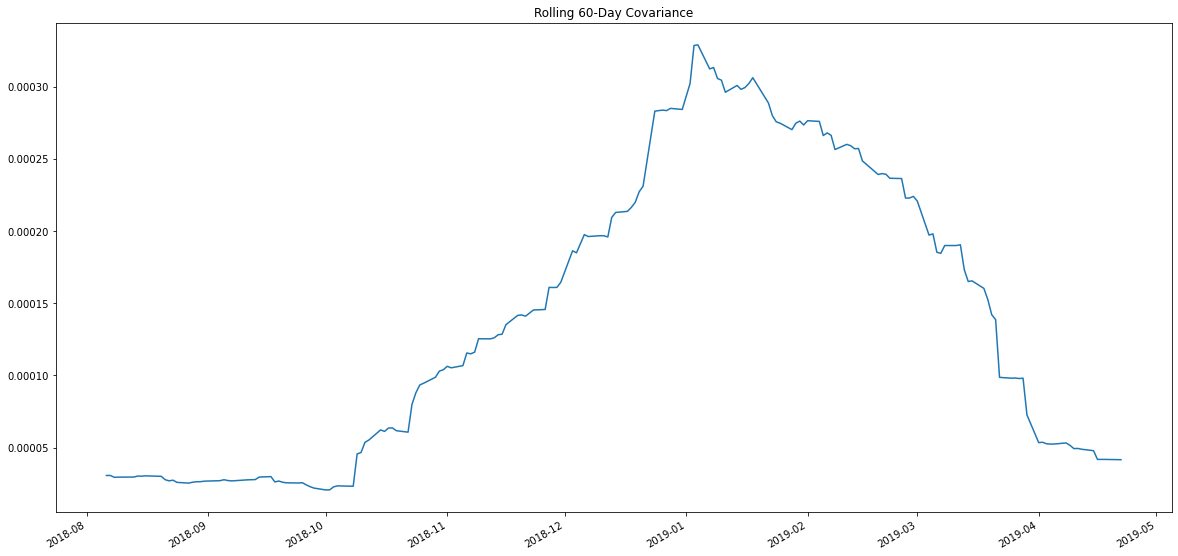

In [114]:
Combo_rolling_covariance = Combo_Portfolio[0].rolling(window=60).cov(Combo_Portfolio['S&P 500'])
Combo_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [115]:
# Calculate Annualzied Sharpe Ratios
Combo_sharpe_ratios = (Combo_Portfolio.mean() * 252) / (Combo_Portfolio.std() * np.sqrt(252))
Combo_sharpe_ratios

Algo 1                         1.999866
Algo 2                         0.009467
SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
S&P 500                       -0.432942
0                             -0.613547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

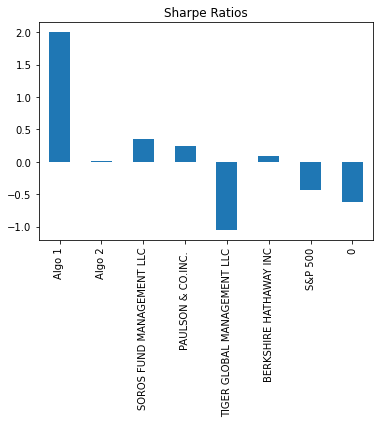

In [116]:
# Visualize the sharpe ratios as a bar plot

Combo_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!